In [1]:
path = 'ch02/usagov_bitly_data2012-03-16-1331923249.txt'

In [2]:
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [3]:
import json
records = [json.loads(line) for line in open(path)]

In [4]:
records[0]

{u'a': u'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 u'al': u'en-US,en;q=0.8',
 u'c': u'US',
 u'cy': u'Danvers',
 u'g': u'A6qOVH',
 u'gr': u'MA',
 u'h': u'wfLQtf',
 u'hc': 1331822918,
 u'hh': u'1.usa.gov',
 u'l': u'orofrog',
 u'll': [42.576698, -70.954903],
 u'nk': 1,
 u'r': u'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 u't': 1331923247,
 u'tz': u'America/New_York',
 u'u': u'http://www.ncbi.nlm.nih.gov/pubmed/22415991'}

In [5]:
records[0]['tz']

u'America/New_York'

In [6]:
print records[0]['tz']

America/New_York


In [7]:
time_zones =  [rec['tz'] for rec in records if 'tz' in rec]

In [8]:
time_zones[:10]

[u'America/New_York',
 u'America/Denver',
 u'America/New_York',
 u'America/Sao_Paulo',
 u'America/New_York',
 u'America/New_York',
 u'Europe/Warsaw',
 u'',
 u'',
 u'']

In [9]:
def get_counts(sequence):
    counts = {}
    for x in  sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

In [10]:
from collections import defaultdict

def get_counts2(sequence):
    counts = defaultdict(int)
    for x in sequence:
        counts[x] += 1
    return counts

In [11]:
counts = get_counts(time_zones)

In [12]:
counts['America/New_York']

1251

In [13]:
len(time_zones)

3440

In [14]:
def top_counts(count_dict, n = 10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [15]:
top_counts(counts)

[(33, u'America/Sao_Paulo'),
 (35, u'Europe/Madrid'),
 (36, u'Pacific/Honolulu'),
 (37, u'Asia/Tokyo'),
 (74, u'Europe/London'),
 (191, u'America/Denver'),
 (382, u'America/Los_Angeles'),
 (400, u'America/Chicago'),
 (521, u''),
 (1251, u'America/New_York')]

In [16]:
from collections import Counter

counts = Counter(time_zones)
counts.most_common(10)

[(u'America/New_York', 1251),
 (u'', 521),
 (u'America/Chicago', 400),
 (u'America/Los_Angeles', 382),
 (u'America/Denver', 191),
 (u'Europe/London', 74),
 (u'Asia/Tokyo', 37),
 (u'Pacific/Honolulu', 36),
 (u'Europe/Madrid', 35),
 (u'America/Sao_Paulo', 33)]

In [17]:
from pandas import DataFrame, Series
import pandas as pd
import numpy as np

frame = DataFrame(records)
frame[:5]

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1.331823e+09,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1.0,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1.331923e+09,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,NaN,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1.308262e+09,j.mp,NaN,bitly,"[40.218102, -111.613297]",0.0,http://www.AwareMap.com/,1.331923e+09,America/Denver,http://www.monroecounty.gov/etc/911/rss.php
2,NaN,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,en-US,US,Washington,xxr3Qb,DC,xxr3Qb,1.331920e+09,1.usa.gov,NaN,bitly,"[38.9007, -77.043098]",1.0,http://t.co/03elZC4Q,1.331923e+09,America/New_York,http://boxer.senate.gov/en/press/releases/0316...
3,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,pt-br,BR,Braz,zCaLwp,27,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,"[-23.549999, -46.616699]",0.0,direct,1.331923e+09,America/Sao_Paulo,http://apod.nasa.gov/apod/ap120312.html
4,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,9b6kNl,MA,9b6kNl,1.273672e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...


In [18]:
frame['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [19]:
tz_counts = frame['tz'].value_counts()
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [20]:
clean_tz = frame['tz'].fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknown'
tz_counts = clean_tz.value_counts()
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

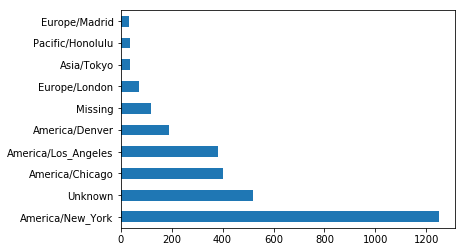

In [21]:
%matplotlib inline
tz_counts[:10].plot(kind = 'barh', rot = 0)

In [22]:
results = Series([x.split()[0] for x in frame.a.dropna()])

In [23]:
results.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

In [24]:
cframe = frame[frame.a.notnull()]

In [25]:
operating_system = np.where(cframe['a'].str.contains('Windows'), 'Windows', 'Not Windows')

In [26]:
operating_system[:5]

array(['Windows', 'Not Windows', 'Windows', 'Not Windows', 'Windows'], 
      dtype='|S11')

In [27]:
by_tz_os = cframe.groupby(['tz', operating_system])

In [28]:
agg_counts = by_tz_os.size().unstack().fillna(0)

In [29]:
agg_counts[:10]

,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


In [30]:
indexer = agg_counts.sum(1).argsort()

In [31]:
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

In [32]:
count_subset  = agg_counts.take(indexer)[-10:]

In [33]:
count_subset

,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


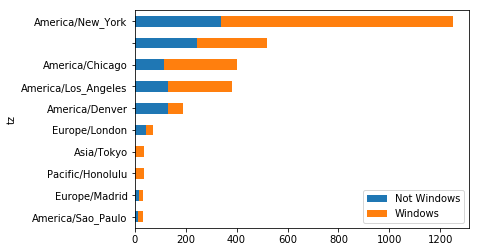

In [34]:
count_subset.plot(kind = 'barh', stacked = True)

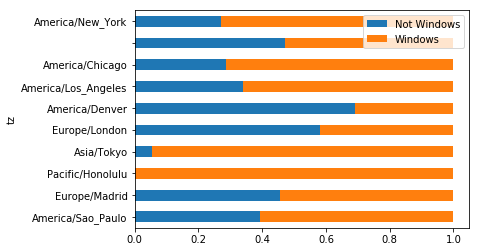

In [35]:
normed_subset = count_subset.div(count_subset.sum(1), axis = 0)
normed_subset.plot(kind = 'barh', stacked = True)

In [36]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('ch02/movielens/users.dat', sep='::', header=None, names=unames, engine='python')
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('ch02/movielens/ratings.dat', sep='::', header=None, names=rnames, engine='python')
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('ch02/movielens/movies.dat', sep='::', header=None, names=mnames, engine='python')

In [37]:
users[:5]

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [38]:
ratings[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [39]:
movies[:5]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [40]:
data = pd.merge(pd.merge(ratings, users), movies)

In [41]:
data[:5]

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


In [42]:
data.loc[0]

user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                  978300760
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

In [43]:
mean_ratings = data.pivot_table('rating', index = 'title', columns = 'gender', aggfunc = 'mean')

In [44]:
mean_ratings[:10]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
1-900 (1994),2.000000,3.000000
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215


In [45]:
ratings_by_title = data.groupby('title').size()
ratings_by_title[:5]

title
$1,000,000 Duck (1971)            37
'Night Mother (1986)              70
'Til There Was You (1997)         52
'burbs, The (1989)               303
...And Justice for All (1979)    199
dtype: int64

In [46]:
active_titles =  ratings_by_title.index[ratings_by_title >= 250]
active_titles[:5]

Index([u''burbs, The (1989)', u'10 Things I Hate About You (1999)',
       u'101 Dalmatians (1961)', u'101 Dalmatians (1996)',
       u'12 Angry Men (1957)'],
      dtype='object', name=u'title')

In [47]:
mean_ratings = mean_ratings.loc[active_titles]
mean_ratings[:5]

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421


In [48]:
top_female_ratings = mean_ratings.sort_values(by = 'F', ascending = False)
top_female_ratings[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


In [49]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']
sorted_by_diff = mean_ratings.sort_values(by = 'diff')
sorted_by_diff[:10]

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


In [50]:
sorted_by_diff[::-1][:10]

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


In [51]:
rating_std_by_title = data.groupby('title')['rating'].std()
rating_std_by_title = rating_std_by_title.loc[active_titles]
rating_std_by_title.sort_values(ascending = False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

In [58]:
names1880 = pd.read_csv('ch02/names/yob1880.txt', names=['name', 'sex', 'births'])
names1880[:5]

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [60]:
names1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [70]:
years = range(1880, 2011)
pieces = []
columns = ['name', 'sex', 'births']

In [71]:
for year in years:
    path = 'ch02/names/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    frame['year'] = year
    pieces.append(frame)
names = pd.concat(pieces, ignore_index=True)
names[:5]

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [72]:
total_births = names.pivot_table('births', index = 'year', columns = 'sex', aggfunc = sum)
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


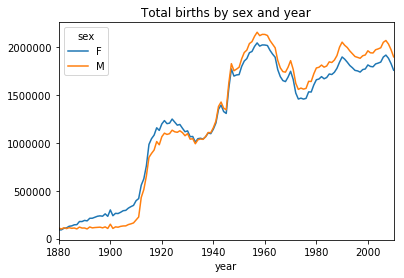

In [73]:
total_births.plot(title = 'Total births by sex and year')

In [75]:
def add_prop(group):
    births = group.births.astype(float)
    group['prop'] = births / births.sum()
    return group
names = names.groupby(['year', 'sex']).apply(add_prop)
names[:5]

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [76]:
np.allclose(names.groupby(['year','sex']).prop.sum(), 1)

True

In [80]:
def get_top1000(group):
    return group.sort_values(by = 'births', ascending = False)[:1000]
grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)
top1000[:5]

name sex  births  year      prop
year sex                                         
1880 F   0       Mary   F    7065  1880  0.077643
         1       Anna   F    2604  1880  0.028618
         2       Emma   F    2003  1880  0.022013
         3  Elizabeth   F    1939  1880  0.021309
         4     Minnie   F    1746  1880  0.019188

In [85]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']
total_births = top1000.pivot_table('births', index = 'year', columns = 'name', aggfunc = sum)
total_births[:5]

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000000419ED8D0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000000042428B70>], dtype=object)

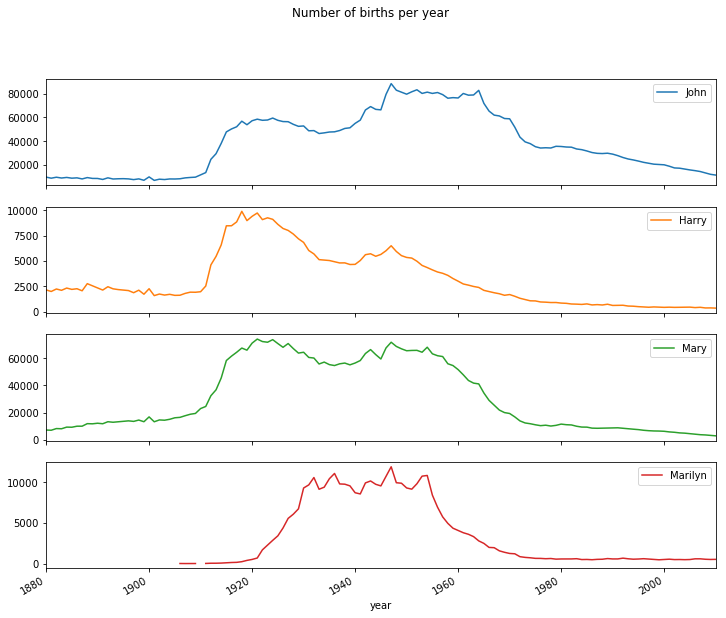

In [91]:
sub_set = total_births[['John', 'Harry', 'Mary', 'Marilyn']]
sub_set.plot(subplots = True, figsize = (12, 10), grid = False, title = "Number of births per year")

In [97]:
table = top1000.pivot_table('prop', index = 'year', columns = 'sex', aggfunc = sum)
table[:5]

sex,F,M
year,,
1880,1.000000,0.997375
1881,1.000000,1.000000
1882,0.998702,0.995646
1883,0.997596,0.998566
1884,0.993156,0.994539


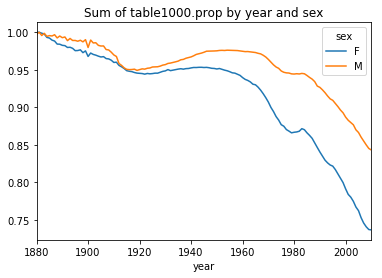

In [99]:
table.plot(title = 'Sum of table1000.prop by year and sex')

In [100]:
df = boys[boys.year == 2010]
df[:5]

name sex  births  year      prop
year sex                                             
2010 M   1676644    Jacob   M   21875  2010  0.011523
         1676645    Ethan   M   17866  2010  0.009411
         1676646  Michael   M   17133  2010  0.009025
         1676647   Jayden   M   17030  2010  0.008971
         1676648  William   M   16870  2010  0.008887

In [101]:
prop_cumsum = df.sort_values(by = 'prop', ascending = False).prop.cumsum()
prop_cumsum[:10]

year  sex         
2010  M    1676644    0.011523
           1676645    0.020934
           1676646    0.029959
           1676647    0.038930
           1676648    0.047817
           1676649    0.056579
           1676650    0.065155
           1676651    0.073414
           1676652    0.081528
           1676653    0.089621
Name: prop, dtype: float64

In [102]:
prop_cumsum.searchsorted(0.5)

array([116], dtype=int64)

In [106]:
df = boys[boys.year == 1900]
in1900 = df.sort_values(by = 'prop', ascending = False).prop.cumsum()
in1900.searchsorted(0.5) + 1

array([25], dtype=int64)

In [109]:
def get_quantile_count(group, q = 0.5):
    group = group.sort_values(by = 'prop', ascending = False)
    return group.prop.cumsum().searchsorted(q)[0] + 1
diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')
diversity.head()

d:\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 'year' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  after removing the cwd from sys.path.
d:\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 'sex' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  after removing the cwd from sys.path.


sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


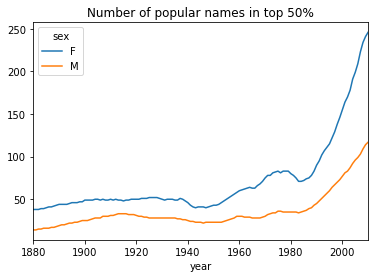

In [110]:
diversity.plot(title = 'Number of popular names in top 50%')

In [117]:
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'
#last_letters[:5]

In [119]:
table = names.pivot_table('births', index = last_letters, columns = ['sex', 'year'], aggfunc = sum)
#table[:5]
subtable = table.reindex(columns = [1910, 1960, 2010], level = 'year')
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

In [120]:
subtable.sum()

sex  year
F    1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

In [122]:
letter_prop = subtable / subtable.sum().astype(float)
letter_prop[:5]

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020470
c            0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d            0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e            0.336941  0.215133  0.178415  0.147556  0.083853  0.067959

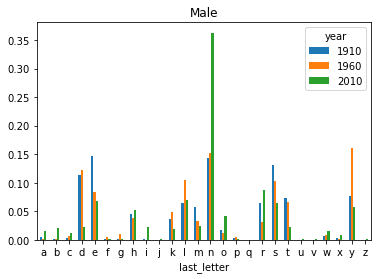

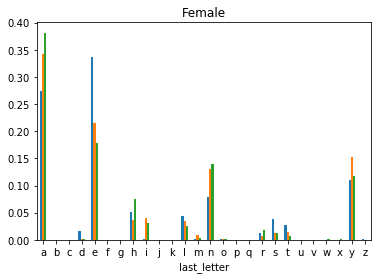

In [124]:
letter_prop['M'].plot(kind = 'bar', rot = 0, title = 'Male')
letter_prop['F'].plot(kind = 'bar', rot = 0, title = 'Female', legend = False)

In [130]:
letter_prop = table / table.sum().astype(float)
dny_ts = letter_prop.loc[['d', 'n', 'y'], 'M'].T
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


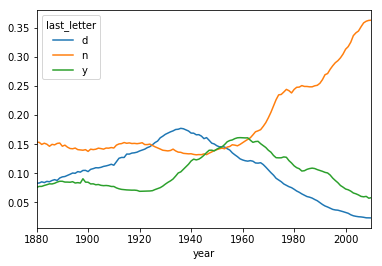

In [131]:
dny_ts.plot()